# Bond Total Return, Yield-To-Maturity and the Spot Rate Curve

This notebook derives the total return formula for bonds when coupons are reinvested at the YTM, then expresses it as a function of Nelson-Siegel spot rate curve factors (Level, Slope, Curvature).


## 1. Total Return with Constant Reinvestment Rate

### 1.1 Constant Reinvestment Rate

When coupons are reinvested at a constant rate $r$, they grow to a future value by maturity. Each coupon payment $c$ received at time $t$ is reinvested until maturity $n$, growing for $(n-t)$ periods. The **future value** of all coupons becomes an annuity:
$$FV_{coupons} = c \cdot \frac{(1+r)^n - 1}{r}$$

The **total return** with constant reinvestment rate $r$ is:
$$TR_r = \frac{c \cdot \frac{(1+r)^n - 1}{r} + P_N - P_0}{P_0}$$

where:
- $c$ = annual coupon payment
- $r$ = constant reinvestment rate
- $n$ = number of years to maturity
- $P_N$ = value at maturity (typically face value $F$)
- $P_0$ = purchase price

### 1.2 Reinvestment Rate Assumptions

In practice, future reinvestment rates are uncertain. However, a natural benchmark is to assume coupons are reinvested at the bond's own yield-to-maturity: $r = y$.

This assumption reveals the **true meaning of YTM**: it is the compound annualized return an investor earns if they can reinvest all coupons at the YTM rate.

Another possibility is to assume that the reinvestment rate is zero. Received coupons then just add over time, they do not compound.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

print("Setup complete!")


Setup complete!


## 2. Bond Purchased at Par with Reinvestment at YTM

### 2.1 Par Bond Condition

When a bond is purchased at par: $P_0 = F$ (purchase price equals face value)

### 2.2 Reinvestment at YTM

**Assumption**: Coupons are reinvested at the yield-to-maturity rate. From bond pricing theory, we now that: $c = y \cdot P_0$ where $y$ is the YTM

Substituting $r = y$, $P_N = F = P_0$, and $c = y \cdot P_0$ into the general formula:

$$TR_y = \frac{y \cdot P_0 \cdot \frac{(1+y)^n - 1}{y} + P_0 - P_0}{P_0}$$

$$= \frac{y \cdot P_0 \cdot \frac{(1+y)^n - 1}{y}}{P_0}$$

The $y$ and $P_0$ terms cancel:

$$\boxed{TR_y = (1+y)^n - 1}$$

This is simply the **compound return** at rate $y$ for $n$ periods.

### 2.3 YTM as Annualized Return

The annualized return from this total return is:

$$\text{Annualized Return} = (1 + TR_y)^{1/n} - 1 = [(1+y)^n]^{1/n} - 1 = y$$

**Therefore**: When coupons are reinvested at the YTM, the bond delivers **exactly** its yield-to-maturity as the compound annualized return.

This is the true definition of YTM: the rate of return earned if:
1. The bond is held to maturity
2. All coupons are reinvested at the YTM rate
3. The bond is purchased at par


In [2]:
# Compare reinvestment assumptions

def total_return_general(n, y, r):
    """Calculate total return with any reinvestment rate"""
    if r == 0:
        return n * y
    else:
        return y * ((1 + r)**n - 1) / r

def total_return_at_ytm(n, y):
    """Calculate total return when r = y (simplified formula)"""
    return (1 + y)**n - 1

# Example calculations
maturities = np.array([5, 10, 15, 20, 30])
ytm = 0.04  # 4% yield

print("="*80)
print(f"TOTAL RETURNS FOR {ytm*100}% YTM BOND")
print("="*80)
print(f"\n{'Maturity':<10} {'TR (r=0%)':<15} {'TR (r=y)':<15} {'Annualized (r=y)':<20}")
print("-"*80)

for n in maturities:
    tr_no_reinv = total_return_general(n, ytm, 0) * 100
    tr_at_ytm = total_return_at_ytm(n, ytm) * 100
    annualized = ((1 + tr_at_ytm/100)**(1/n) - 1) * 100

    print(f"{n:<10} {tr_no_reinv:<15.2f} {tr_at_ytm:<15.2f} {annualized:<20.4f}")

print("\nNote: With r=y, the annualized return EXACTLY equals the YTM (4.00%)")
print("="*80)


TOTAL RETURNS FOR 4.0% YTM BOND

Maturity   TR (r=0%)       TR (r=y)        Annualized (r=y)    
--------------------------------------------------------------------------------
5          20.00           21.67           4.0000              
10         40.00           48.02           4.0000              
15         60.00           80.09           4.0000              
20         80.00           119.11          4.0000              
30         120.00          224.34          4.0000              

Note: With r=y, the annualized return EXACTLY equals the YTM (4.00%)


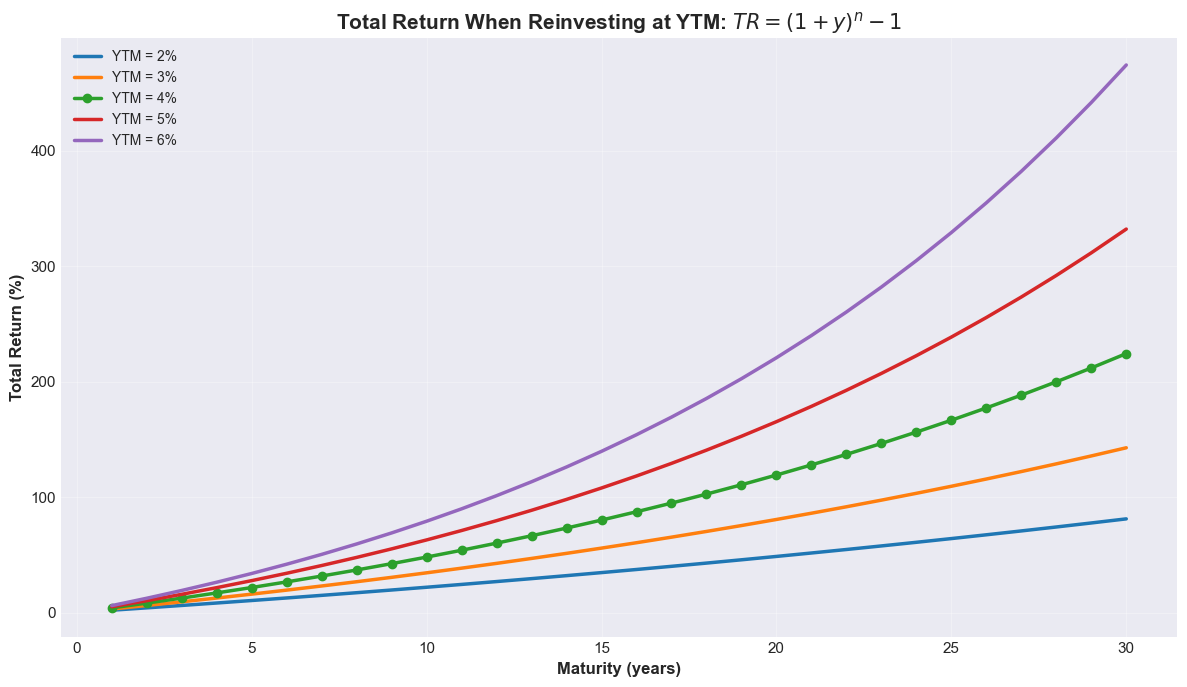

Notice the exponential (compound) growth pattern!
This is fundamentally different from linear growth (r=0).


In [3]:
# Visualization: Compound growth when reinvesting at YTM

fig, ax = plt.subplots(figsize=(12, 7))

ytm_levels = [0.02, 0.03, 0.04, 0.05, 0.06]
mats_plot = np.arange(1, 31)

for y in ytm_levels:
    returns = [total_return_at_ytm(n, y) * 100 for n in mats_plot]
    ax.plot(mats_plot, returns, marker='o' if y == 0.04 else None, 
            linewidth=2.5, markersize=6, label=f'YTM = {y*100:.0f}%')

ax.set_xlabel('Maturity (years)', fontweight='bold')
ax.set_ylabel('Total Return (%)', fontweight='bold')
ax.set_title('Total Return When Reinvesting at YTM: $TR = (1+y)^n - 1$', 
             fontweight='bold', fontsize=15)
ax.legend(loc='upper left', framealpha=0.95)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Notice the exponential (compound) growth pattern!")
print("This is fundamentally different from linear growth (r=0).")


## 3. YTM as Weighted Average of Spot Rates

### 3.1 Spot Rates vs YTM

The **spot rate curve** maps maturities to spot rates (yields on zero-coupon bonds).

The **YTM** is the single discount rate that equates a bond's price to its cash flows:

**Using spot rates** $s_1, s_2, \ldots, s_n$:
$$P_0 = \sum_{t=1}^{n-1} \frac{c}{(1+s_t)^t} + \frac{c+F}{(1+s_n)^n}$$

**Using YTM** $y$:
$$P_0 = \sum_{t=1}^{n-1} \frac{c}{(1+y)^t} + \frac{c+F}{(1+y)^n}$$

### 3.2 Weighted Average Interpretation of YTM

YTM behaves like a weighted average of spot rates where weights equal the present value of each cash flow:

$$w_t = \frac{PV(CF_t)}{P_0}$$

**Properties:**
1. If all spot rates are equal ($s_t = s$), then $y = s$
2. YTM lies between the minimum and maximum spot rates
3. Longer-maturity cash flows (especially principal) have largest weights


In [4]:
# Demonstrate YTM as weighted average

def bond_price_from_spots(c, F, spot_rates):
    """Calculate bond price using spot rates"""
    n = len(spot_rates)
    price = 0
    pv_flows = []

    for t in range(1, n + 1):
        cf = c if t < n else c + F
        pv = cf / (1 + spot_rates[t-1])**t
        price += pv
        pv_flows.append(pv)

    return price, np.array(pv_flows)

def ytm_from_price(c, F, price, n):
    """Solve for YTM given bond price"""
    def objective(y):
        p = sum(c / (1+y)**t for t in range(1, n)) + (c + F) / (1+y)**n
        return p - price

    return fsolve(objective, 0.04)[0]

# Example: 5-year bond
c = 5
F = 100
n = 5

scenarios = {
    'Normal (upward sloping)': np.array([0.02, 0.025, 0.03, 0.035, 0.04]),
    'Flat': np.array([0.03, 0.03, 0.03, 0.03, 0.03]),
    'Inverted (downward sloping)': np.array([0.05, 0.045, 0.04, 0.035, 0.03])
}

print("="*80)
print(f"YTM AS WEIGHTED AVERAGE: {n}-year bond, {c}% coupon, ${F} face value")
print("="*80)

for name, spots in scenarios.items():
    print(f"\n{name}:")
    print("-" * 60)

    price, pv_flows = bond_price_from_spots(c, F, spots)
    ytm = ytm_from_price(c, F, price, n)
    weights = pv_flows / price

    print(f"{'Year':<6} {'Spot':<10} {'Cash Flow':<12} {'PV':<12} {'Weight':<10}")
    for t in range(n):
        cf = c if t < n-1 else c + F
        print(f"{t+1:<6} {spots[t]*100:>5.2f}%    ${cf:>6.2f}      ${pv_flows[t]:>8.2f}    {weights[t]:>7.4f}")

    weighted_avg_spot = np.sum(weights * spots)

    print(f"\nBond Price: ${price:.2f}")
    print(f"YTM: {ytm*100:.4f}%")
    print(f"Spot rate range: [{spots.min()*100:.2f}%, {spots.max()*100:.2f}%]")
    print(f"Weighted avg spot: {weighted_avg_spot*100:.4f}%")


YTM AS WEIGHTED AVERAGE: 5-year bond, 5% coupon, $100 face value

Normal (upward sloping):
------------------------------------------------------------
Year   Spot       Cash Flow    PV           Weight    
1       2.00%    $  5.00      $    4.90     0.0467
2       2.50%    $  5.00      $    4.76     0.0454
3       3.00%    $  5.00      $    4.58     0.0436
4       3.50%    $  5.00      $    4.36     0.0415
5       4.00%    $105.00      $   86.30     0.8227

Bond Price: $104.90
YTM: 3.9031%
Spot rate range: [2.00%, 4.00%]
Weighted avg spot: 3.7741%

Flat:
------------------------------------------------------------
Year   Spot       Cash Flow    PV           Weight    
1       3.00%    $  5.00      $    4.85     0.0445
2       3.00%    $  5.00      $    4.71     0.0432
3       3.00%    $  5.00      $    4.58     0.0419
4       3.00%    $  5.00      $    4.44     0.0407
5       3.00%    $105.00      $   90.57     0.8297

Bond Price: $109.16
YTM: 3.0000%
Spot rate range: [3.00%, 3.00%]
W

## 4. The Nelson-Siegel Model for the Spot Rate Curve

### 4.1 Three-Factor Decomposition

The **Nelson-Siegel (NS) model** represents the spot rate curve using three factors:

$$s(t) = L + S \cdot f_S(t) + C \cdot f_C(t)$$

**Loading functions** for discrete maturity $t$:
$$f_S(t) = \frac{1 - e^{-\lambda t}}{\lambda t}$$

$$f_C(t) = \frac{1 - e^{-\lambda t}}{\lambda t} - e^{-\lambda t}$$

### 4.2 Factor Interpretation

| Factor | Symbol | Loading | Meaning |
|--------|--------|---------|---------|
| **Level** | $L$ | $f_L(t) = 1$ | Long-term rate level (parallel shifts) |
| **Slope** | $S$ | $f_S(t)$ | Short vs long rate spread (tilt) |
| **Curvature** | $C$ | $f_C(t)$ | Medium-term "belly" (bow) |

**Decay parameter** $\lambda$: Typically $\lambda = 0.0609$ (Diebold-Li)
- Determines where curvature peaks (~30 years)
- Controls decay speed of slope effect

### 4.3 Loading Function Behavior

**Level**: $f_L(t) = 1$ for all maturities
- **Constant** across all maturities
- Represents parallel shifts in the spot rate curve
- Dominates spot rate determination at all maturities

**Slope**: $f_S(t) \to 1$ as $t \to 0$, $f_S(t) \to 0$ as $t \to \infty$
- **Monotonically decreases** with maturity
- Short bonds (1 year): $f_S \approx 0.97$ (high sensitivity to slope)
- Long bonds (30 years): $f_S \approx 0.46$ (lower sensitivity)
- Very long maturity: $f_S \to 0$ (no slope sensitivity)

**Curvature**: Complex non-monotonic behavior
- Starts at 0 for very short maturities ($f_C \to 0$ as $t \to 0$)
- **Increases** to a maximum around $t \approx 30$ years (with $\lambda = 0.0609$)
- **Decreases slowly** toward 0 for very long maturities ($f_C \to 0$ as $t \to \infty$)
- Peak value: $f_C \approx 0.30$ (still much less than Level = 1.0)
- Captures hump-shaped spot rate curve patterns


In [5]:
# Nelson-Siegel implementation

def f_slope(t, lam=0.0609):
    """Slope loading function"""
    return (1 - np.exp(-lam * t)) / (lam * t)

def f_curvature(t, lam=0.0609):
    """Curvature loading function"""
    return (1 - np.exp(-lam * t)) / (lam * t) - np.exp(-lam * t)

def nelson_siegel(t, L, S, C, lam=0.0609):
    """Spot rate at maturity t from NS model"""
    return L + S * f_slope(t, lam) + C * f_curvature(t, lam)

# Display loading functions
lam = 0.0609
mats = [1, 2, 3, 5, 7, 10, 15, 20, 30, 50]

print("Nelson-Siegel Loading Functions (λ = {:.4f}):\n".format(lam))
print(f"{'Maturity':<10} {'f_L(t)':<12} {'f_S(t)':<12} {'f_C(t)':<12} {'Pattern':<20}")
print("-"*70)
for t in mats:
    fl = 1.0
    fs = f_slope(t, lam)
    fc = f_curvature(t, lam)

    # Describe pattern
    if t <= 5:
        pattern = "Short-term"
    elif t <= 15:
        pattern = "Medium-term"
    else:
        pattern = "Long-term"

    print(f"{t:<10} {fl:<12.6f} {fs:<12.6f} {fc:<12.6f} {pattern:<20}")

print("\nNote:")
print("  • Level (f_L): Constant = 1.0 at all maturities")
print("  • Slope (f_S): Decreases from 0.97 → 0.46 → 0")
print("  • Curvature (f_C): Increases from 0 → peaks at ~30yr → decreases toward 0")


Nelson-Siegel Loading Functions (λ = 0.0609):

Maturity   f_L(t)       f_S(t)       f_C(t)       Pattern             
----------------------------------------------------------------------
1          1.000000     0.970159     0.029242     Short-term          
2          1.000000     0.941499     0.056174     Short-term          
3          1.000000     0.913968     0.080950     Short-term          
5          1.000000     0.862095     0.124603     Short-term          
7          1.000000     0.814167     0.161247     Medium-term         
10         1.000000     0.748942     0.205047     Medium-term         
15         1.000000     0.655591     0.254473     Medium-term         
20         1.000000     0.578143     0.282322     Long-term           
30         1.000000     0.459280     0.298384     Long-term           
50         1.000000     0.312776     0.265180     Long-term           

Note:
  • Level (f_L): Constant = 1.0 at all maturities
  • Slope (f_S): Decreases from 0.97 → 0.46 

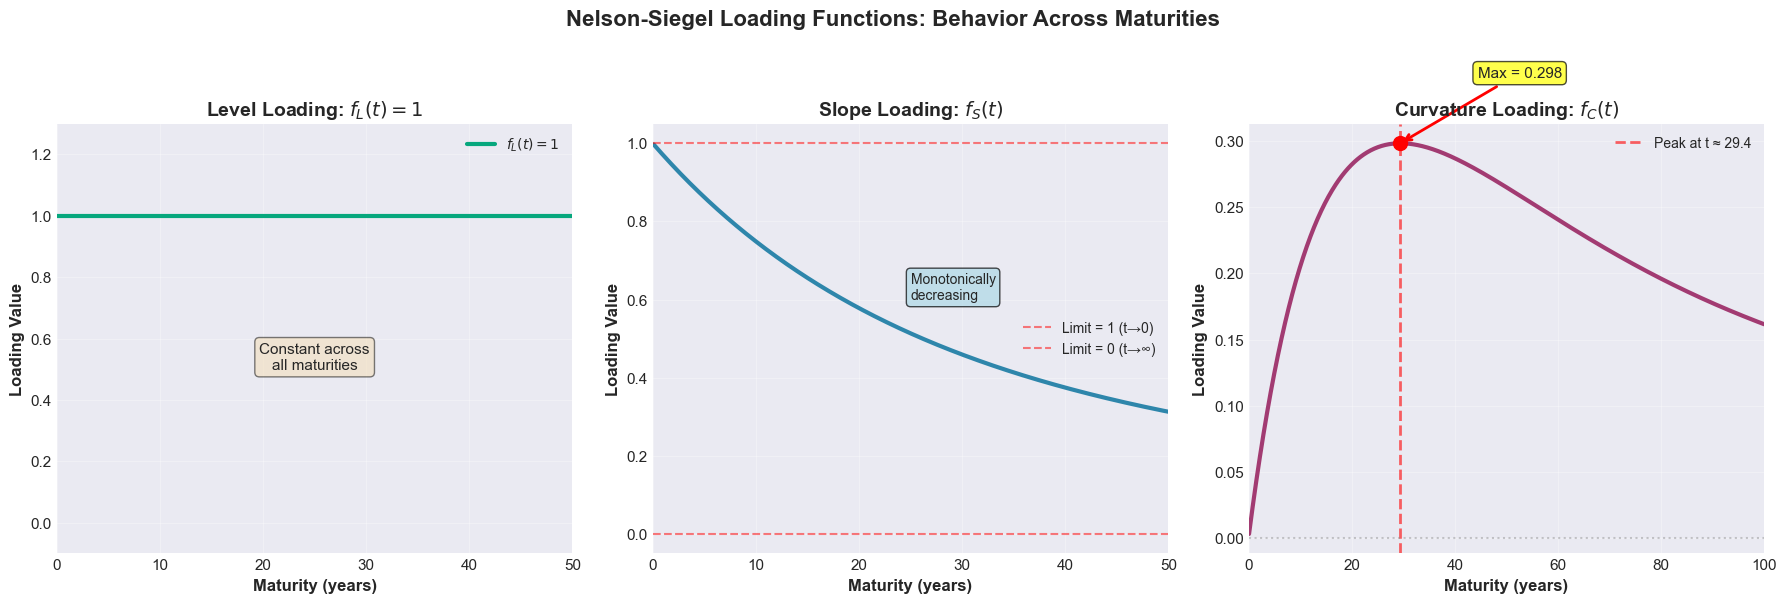


Key Observations:
  • Level:     CONSTANT (always 1.0)
  • Slope:     DECREASING (1.0 → 0)
  • Curvature: NON-MONOTONIC (0 → peak at ~29yr → 0)


In [6]:
# Plot all three loading functions with detailed annotations

t_range = np.linspace(0.1, 100, 1000)
lam = 0.0609

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Level loading
axes[0].axhline(1, linewidth=3, color='#06A77D', label='$f_L(t) = 1$')
axes[0].set_xlabel('Maturity (years)', fontweight='bold')
axes[0].set_ylabel('Loading Value', fontweight='bold')
axes[0].set_title('Level Loading: $f_L(t) = 1$', fontweight='bold', fontsize=14)
axes[0].set_ylim(-0.1, 1.3)
axes[0].set_xlim(0, 50)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(25, 0.5, 'Constant across\nall maturities', ha='center', fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Slope loading
fs_vals = f_slope(t_range, lam)
axes[1].plot(t_range, fs_vals, linewidth=3, color='#2E86AB')
axes[1].axhline(1, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='Limit = 1 (t→0)')
axes[1].axhline(0, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='Limit = 0 (t→∞)')
axes[1].set_xlabel('Maturity (years)', fontweight='bold')
axes[1].set_ylabel('Loading Value', fontweight='bold')
axes[1].set_title('Slope Loading: $f_S(t)$', fontweight='bold', fontsize=14)
axes[1].set_xlim(0, 50)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].annotate('Monotonically\ndecreasing', xy=(25, 0.6), fontsize=10,
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# Curvature loading
fc_vals = f_curvature(t_range, lam)
peak_idx = np.argmax(fc_vals)
peak_t = t_range[peak_idx]
peak_val = fc_vals[peak_idx]

axes[2].plot(t_range, fc_vals, linewidth=3, color='#A23B72')
axes[2].axvline(peak_t, color='red', linestyle='--', alpha=0.6, 
                linewidth=2, label=f'Peak at t ≈ {peak_t:.1f}')
axes[2].scatter([peak_t], [peak_val], color='red', s=100, zorder=5)
axes[2].axhline(0, color='gray', linestyle=':', alpha=0.4)
axes[2].set_xlabel('Maturity (years)', fontweight='bold')
axes[2].set_ylabel('Loading Value', fontweight='bold')
axes[2].set_title('Curvature Loading: $f_C(t)$', fontweight='bold', fontsize=14)
axes[2].set_xlim(0, 100)
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].annotate(f'Max = {peak_val:.3f}', xy=(peak_t, peak_val), 
                xytext=(peak_t+15, peak_val+0.05),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.suptitle('Nelson-Siegel Loading Functions: Behavior Across Maturities', 
             fontweight='bold', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("  • Level:     CONSTANT (always 1.0)")
print("  • Slope:     DECREASING (1.0 → 0)")
print(f"  • Curvature: NON-MONOTONIC (0 → peak at ~{peak_t:.0f}yr → 0)")


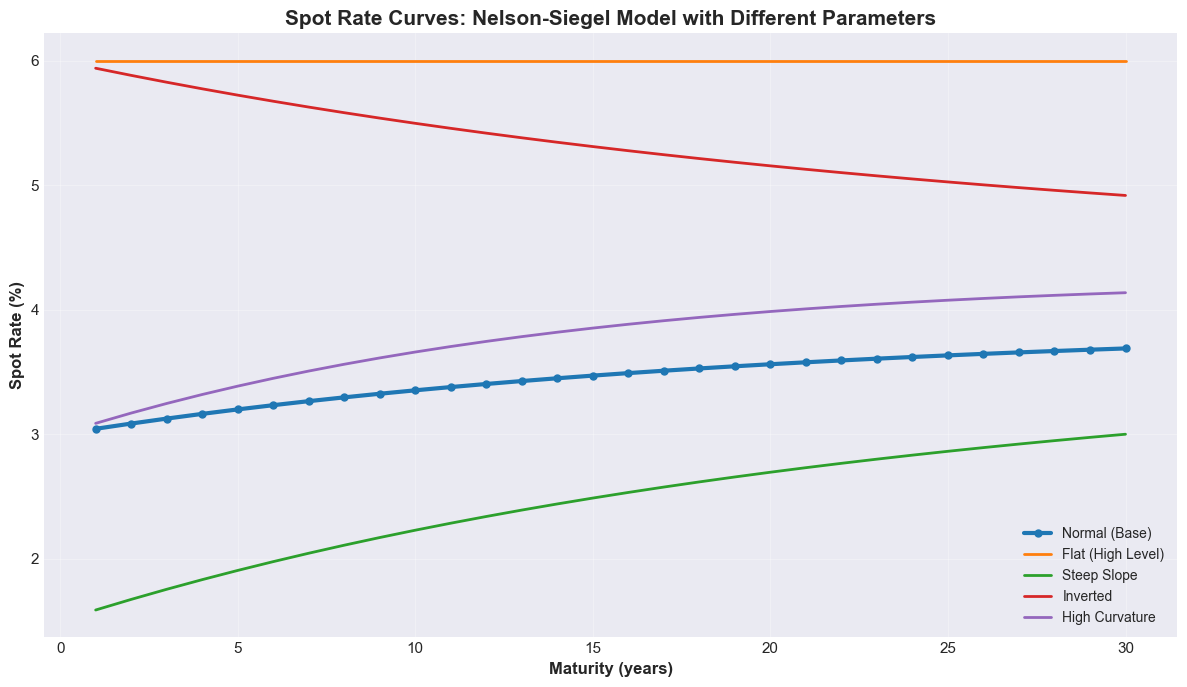

Spot Rate Curves at Selected Maturities:
    Normal (Base)  Flat (High Level)  Steep Slope  Inverted  High Curvature
1           3.044                6.0        1.589     5.940           3.088
2           3.087                6.0        1.674     5.883           3.171
5           3.200                6.0        1.907     5.724           3.387
10          3.354                6.0        2.230     5.498           3.661
20          3.563                6.0        2.696     5.156           3.987
30          3.690                6.0        3.001     4.919           4.137


In [7]:
# Generate spot rate curves with different NS parameters

t_range_plot = np.arange(1, 31)

scenarios = {
    'Normal (Base)': (0.04, -0.01, 0.005),
    'Flat (High Level)': (0.06, 0.0, 0.0),
    'Steep Slope': (0.04, -0.025, 0.005),
    'Inverted': (0.04, 0.02, 0.0),
    'High Curvature': (0.04, -0.01, 0.02)
}

fig, ax = plt.subplots(figsize=(12, 7))

for label, (L, S, C) in scenarios.items():
    spotrates = [nelson_siegel(t, L, S, C) * 100 for t in t_range_plot]
    linewidth = 3 if 'Base' in label else 2
    ax.plot(t_range_plot, spotrates, linewidth=linewidth, label=label, 
            marker='o' if 'Base' in label else None, markersize=5)

ax.set_xlabel('Maturity (years)', fontweight='bold')
ax.set_ylabel('Spot Rate (%)', fontweight='bold')
ax.set_title('Spot Rate Curves: Nelson-Siegel Model with Different Parameters', 
             fontweight='bold', fontsize=15)
ax.legend(loc='best', framealpha=0.95)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print table
print("Spot Rate Curves at Selected Maturities:")
print("="*80)
df_spotrates = pd.DataFrame(index=[1, 2, 5, 10, 20, 30])
for label, (L, S, C) in scenarios.items():
    df_spotrates[label] = [nelson_siegel(t, L, S, C)*100 for t in df_spotrates.index]
print(df_spotrates.round(3))


## 5. Total Return Decomposition

The Nelson-Siegel model generates a spot rate curve $s(t)$, representing zero-coupon yields at each maturity. However, a coupon bond's YTM is a weighted average of all spot rates up to maturity. For a par bond with coupon rate equal to YTM, this weighted average converges to the terminal spot rate. The approximation error depends on curve shape: for a flat spot curve, the YTM is exactly equal to the spot rate. The steeper the curve, the larger the error(YTM pulls down toward short rates). For inverted curves, the error can be significant (YTM pulls up toward short rates). We assume that approximation is good enough, because it will allow the following:

Substituting (2) into (1):

$$\boxed{TR(L, S, C) = \left[1 + L + S \cdot f_S(n) + C \cdot f_C(n)\right]^n - 1}$$

This expresses total return as a **nonlinear function** of the Nelson-Siegel factors. While the formula is compact, we can understand how each factor contributes.


## 6. YTM Decomposition

The yield-to-maturity itself can be decomposed linearly into factor contributions:

$$y(n) = L + S \cdot f_S(n) + C \cdot f_C(n)$$

For each maturity, we calculate:
- **Level contribution**: $y_L = L$ (constant loading)
- **Slope contribution**: $y_S = S \cdot f_S(n)$ (decreasing loading)
- **Curvature contribution**: $y_C = C \cdot f_C(n)$ (non-monotonic loading)

Note that first calculating the  **annualized total return** (see above) leads to the same linear decomposition.

In [8]:
# Analyze yield contributions across maturities

def f_slope(t, lam=0.0609):
    """Slope loading function"""
    tau = lam
    return (1 - np.exp(-tau * t)) / (tau * t)

def f_curvature(t, lam=0.0609):
    """Curvature loading function"""
    tau = lam
    return f_slope(t, lam) - np.exp(-tau * t)

def nelson_siegel(t, L, S, C, lam=0.0609):
    """Nelson-Siegel spot rate at maturity t"""
    return L + S * f_slope(t, lam) + C * f_curvature(t, lam)

def total_return_ns_at_ytm(n, L, S, C, lam=0.0609):
    """Total return when reinvesting at YTM (par bond case)"""
    s_n = nelson_siegel(n, L, S, C, lam)
    return (1 + s_n) ** n - 1

L, S, C = 0.03, -0.01, 0.005
mats = [1, 2, 3, 5, 7, 10, 15, 20, 30, 50]

print("="*80)
print(f"YIELD DECOMPOSITION BY FACTOR")
print(f"NS Parameters: L={L*100}%, S={S*100}%, C={C*100}%")
print("="*80)

results_yield = []
for n in mats:
    fs = f_slope(n)
    fc = f_curvature(n)

    y_level = L * 100
    y_slope = S * fs * 100
    y_curve = C * fc * 100
    y_total = nelson_siegel(n, L, S, C) * 100

    # Calculate absolute contributions
    abs_level = abs(y_level)
    abs_slope = abs(y_slope)
    abs_curve = abs(y_curve)
    abs_total = abs_level + abs_slope + abs_curve

    pct_level = abs_level / abs_total * 100
    pct_slope = abs_slope / abs_total * 100
    pct_curve = abs_curve / abs_total * 100

    tr_total = total_return_ns_at_ytm(n, L, S, C) * 100

    results_yield.append({
        'Maturity': n,
        'f_S(n)': fs,
        'f_C(n)': fc,
        'Level': y_level,
        'Slope': y_slope,
        'Curvature': y_curve,
        'Total Yield': y_total,
        'Level %': pct_level,
        'Slope %': pct_slope,
        'Curve %': pct_curve
    })

df_yield_decomp = pd.DataFrame(results_yield)
print("\nYield Contributions (basis points):")
print(df_yield_decomp[['Maturity', 'Level', 'Slope', 'Curvature', 'Total Yield']].round(3))

print("\n\nRelative Contributions (% of absolute total):")
print(df_yield_decomp[['Maturity', 'f_S(n)', 'f_C(n)', 'Level %', 'Slope %', 'Curve %']].round(2))

print("\n\nKey Observations:")
print("  • Level: CONSTANT absolute value (3.0%), but increasing relative share (75%→86%)")
print("  • Slope: DECREASING absolute and relative contributions")
print(f"  • Curvature: NON-MONOTONIC, peaks around 30yr (f_C max ≈ {df_yield_decomp['f_C(n)'].max():.3f})")


YIELD DECOMPOSITION BY FACTOR
NS Parameters: L=3.0%, S=-1.0%, C=0.5%

Yield Contributions (basis points):
   Maturity  Level  Slope  Curvature  Total Yield
0         1    3.0 -0.970      0.015        2.044
1         2    3.0 -0.941      0.028        2.087
2         3    3.0 -0.914      0.040        2.127
3         5    3.0 -0.862      0.062        2.200
4         7    3.0 -0.814      0.081        2.266
5        10    3.0 -0.749      0.103        2.354
6        15    3.0 -0.656      0.127        2.472
7        20    3.0 -0.578      0.141        2.563
8        30    3.0 -0.459      0.149        2.690
9        50    3.0 -0.313      0.133        2.820


Relative Contributions (% of absolute total):
   Maturity  f_S(n)  f_C(n)  Level %  Slope %  Curve %
0         1    0.97    0.03    75.29    24.35     0.37
1         2    0.94    0.06    75.57    23.72     0.71
2         3    0.91    0.08    75.86    23.11     1.02
3         5    0.86    0.12    76.44    21.97     1.59
4         7    0.81  

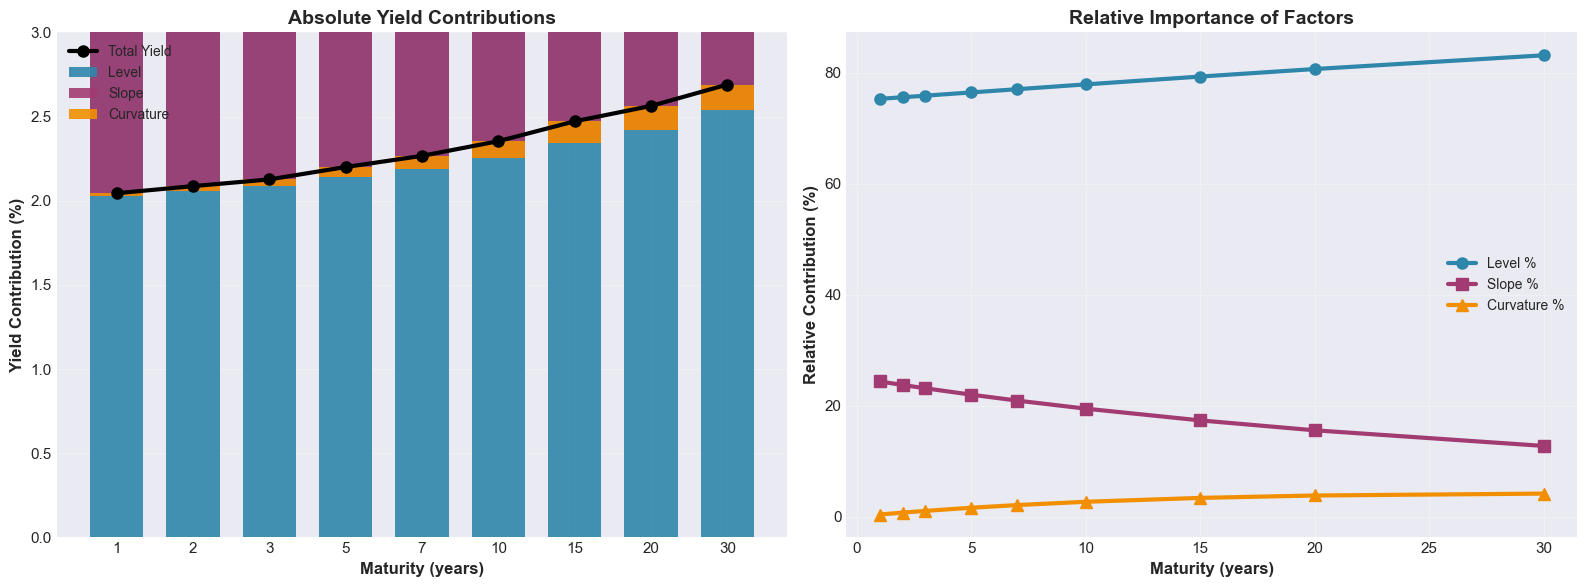


Interpretation:
  Left: Level is constant, Slope decreases, Curvature peaks
  Right: Level's relative share increases because Slope decreases faster


In [9]:
# Visualize yield decomposition

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute contributions
mats_subset = [1, 2, 3, 5, 7, 10, 15, 20, 30]
df_subset = df_yield_decomp[df_yield_decomp['Maturity'].isin(mats_subset)]

x_pos = np.arange(len(mats_subset))
bar_width = 0.7

level_vals = df_subset['Level'].values
slope_vals = df_subset['Slope'].values
curve_vals = df_subset['Curvature'].values

p1 = ax1.bar(x_pos, level_vals, bar_width, label='Level', color='#2E86AB', alpha=0.9)
p2 = ax1.bar(x_pos, slope_vals, bar_width, bottom=level_vals,
            label='Slope', color='#A23B72', alpha=0.9)
p3 = ax1.bar(x_pos, curve_vals, bar_width, 
            bottom=level_vals + slope_vals,
            label='Curvature', color='#F18F01', alpha=0.9)

ax1.plot(x_pos, df_subset['Total Yield'], color='black', marker='o', 
        linewidth=3, markersize=8, label='Total Yield', zorder=10)

ax1.set_xlabel('Maturity (years)', fontweight='bold')
ax1.set_ylabel('Yield Contribution (%)', fontweight='bold')
ax1.set_title('Absolute Yield Contributions', fontweight='bold', fontsize=14)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(mats_subset)
ax1.legend(loc='upper left', framealpha=0.95)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Relative contributions
ax2.plot(df_subset['Maturity'], df_subset['Level %'], marker='o', linewidth=3, 
         markersize=8, label='Level %', color='#2E86AB')
ax2.plot(df_subset['Maturity'], df_subset['Slope %'], marker='s', linewidth=3,
         markersize=8, label='Slope %', color='#A23B72')
ax2.plot(df_subset['Maturity'], df_subset['Curve %'], marker='^', linewidth=3,
         markersize=8, label='Curvature %', color='#F18F01')

ax2.set_xlabel('Maturity (years)', fontweight='bold')
ax2.set_ylabel('Relative Contribution (%)', fontweight='bold')
ax2.set_title('Relative Importance of Factors', fontweight='bold', fontsize=14)
ax2.legend(framealpha=0.95)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("  Left: Level is constant, Slope decreases, Curvature peaks")
print("  Right: Level's relative share increases because Slope decreases faster")
